In [1]:
# A grid displaying the activity of all units within an electrode/well/plate
import numpy as np
import math
%matplotlib widget
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd
import csv
import matplotlib.gridspec as gridspec

In [2]:
# Extract units data
units = {}
with open('div14 ac(000)(000).unitexp.txt', "r", encoding='UTF-8') as infile:
    lines = list(csv.reader(infile, delimiter=','))
    N_neurons = len(lines)
    headers = lines[0]
    print(headers)
    for i, line in enumerate(lines[1:]):
        unit_info = line[:12]
        identity = unit_info[1] + '_' + unit_info[2]
        units[identity] = dict(zip(headers,unit_info)),line[12:]

['Channel', 'Channel Name', 'Unit Number', 'Number of Waveforms', 'Sort Method Used', 'Small ISI %', 'RMSE', 'L-Ratio (3D)', 'Isolation Distance (3D)', 'Peak of Unit Template', 'Valley of Unit Template', 'Peak-Valley of Unit Template']


In [3]:
# Extract waveforms data
wfs = {}
with open('div14 ac(000)(000).wfexp.txt', "r", encoding='UTF-8') as infile:
    lines = list(csv.reader(infile, delimiter=','))
    N_wfs = len(lines)
    wf_headers = lines[0]
    print(wf_headers)
    for i, line in enumerate(lines[1:]):
        wf_info = line[:12]
        wf_id = wf_info[2] + '_' + wf_info[1]
        wfs[wf_id] = dict(zip(wf_headers,wf_info)),line[12:]

['Channel', 'Unit', 'Channel Name', 'Timestamp', 'PC 1', 'PC 2', 'PC 3', 'Energy', 'Nonlinear Energy', 'Peak', 'Valley', 'Peak-Valley']


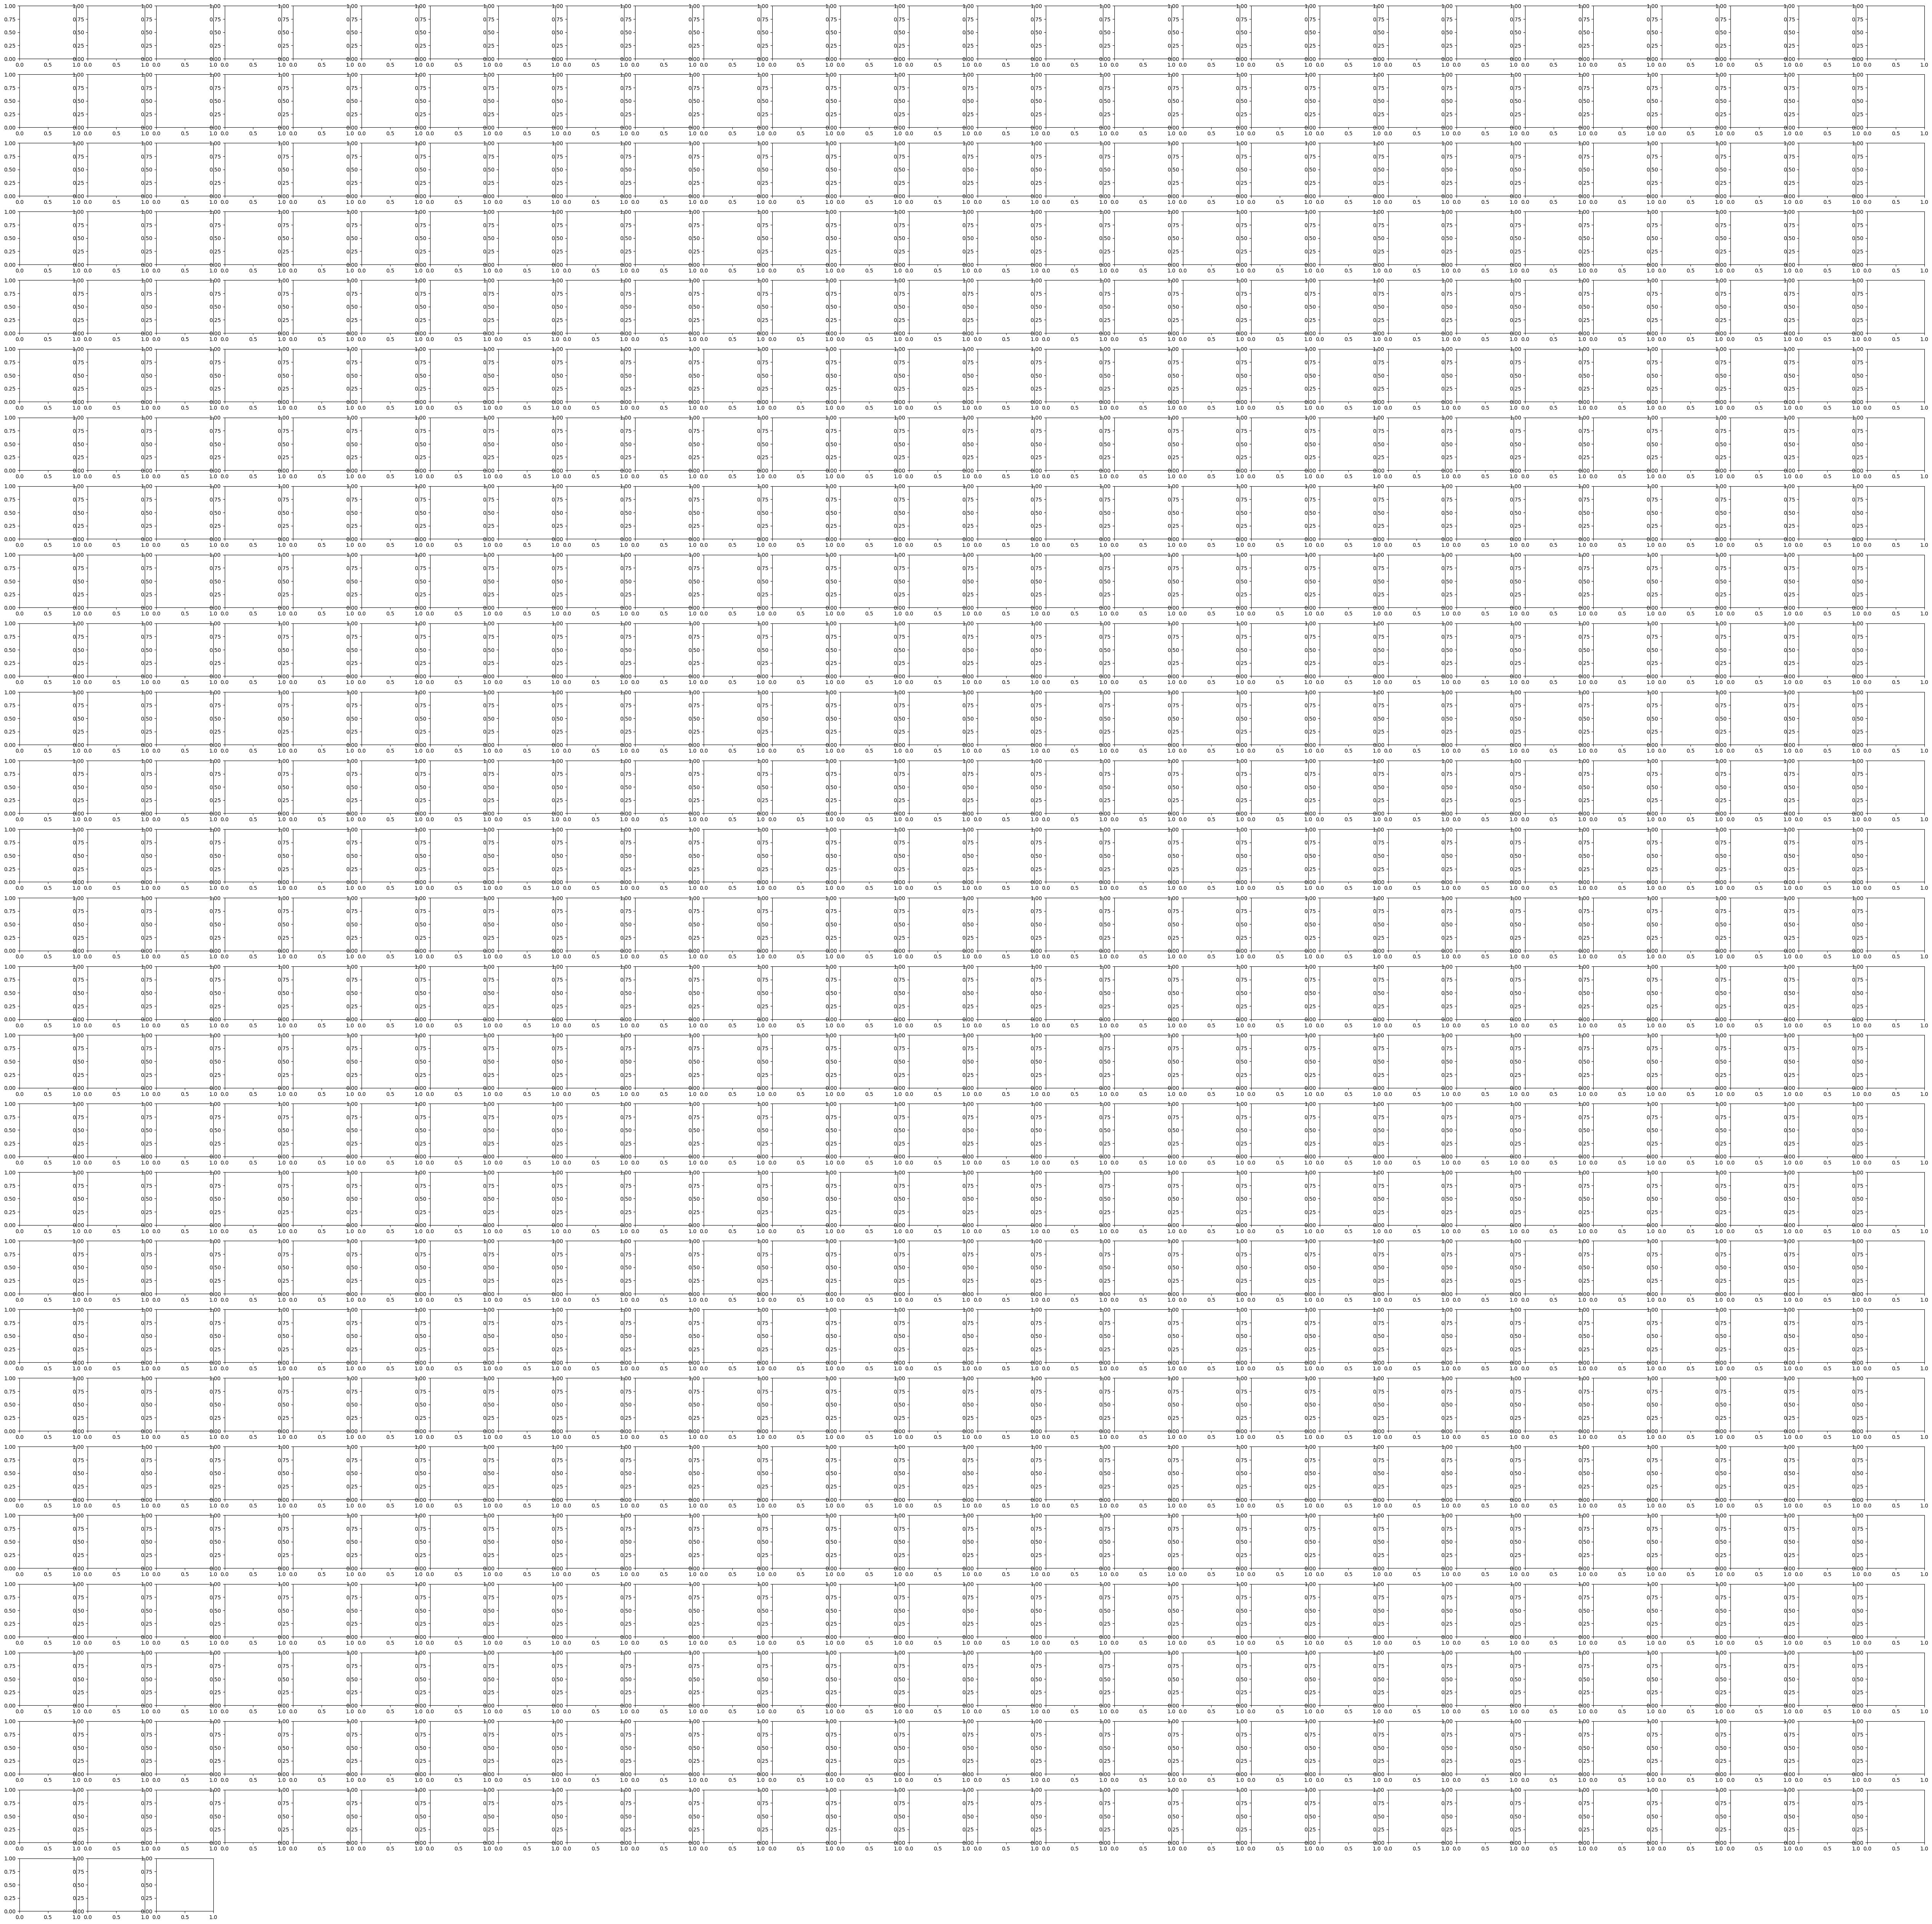

In [5]:
# Create grid
side = math.ceil(math.sqrt(N_neurons))
ratios = [1] * side
gifs = plt.figure(constrained_layout=False, figsize=(50,50), dpi=100, facecolor = 'white')
gs = gifs.add_gridspec(nrows=side, ncols=side, left=0, right=1, top=1, bottom=0,
                         height_ratios=ratios, width_ratios=ratios, wspace=0.2, hspace=0.3)

all_axes = {}
for p in list(range(N_neurons)):
    if p <= side-1:
        all_axes[p] = gifs.add_subplot(gs[0, p])
    else:
        row = p//side
        column = abs(p - side * row)
        all_axes[p] = gifs.add_subplot(gs[row, column])
axes = gifs.get_axes()

In [ ]:
x=np.array(list(range(0,38)))
y=np.array(line[12:])

plt.plot(x,y)
plt.axis('equal')

In [ ]:
%matplotlib qt5
x_data = []
y_data = []

fig, ax = plt.subplots()
ax.set_xlim(0, 105)
ax.set_ylim(0, 12)
line, = ax.plot(0, 0)

def animation_frame(i):
    x_data.append(i * 10)
    y_data.append(i)

    line.set_xdata(x_data)
    line.set_ydata(y_data)
    return line,

animation = FuncAnimation(fig, func=animation_frame, frames=np.arange(0, 10, 0.1), interval=10)
# plt.show()